# Aquecimento global no século 21

(INTRODUÇAO - MELHORAR DEPOIS)

O aquecimento global é provavelmente o maior desafio que a humanidade já teve que enfrentar. Sub-produto da busca humana por desenvolvimento, ele ameaça todas as formas de vida presentes no planeta.
Desde o advento da Revolução Industrial em 1760, pesquisadores já desconfiavam que o CO2 emitido pelas cada vez mais numerosas máquinas a carvão iria aquecer o planeta em alguns séculos (FONTE). Agora, um estudo realizado em 2020 revela que até um terço de toda fauna e flora global podem ser extintas até 2070 (FONTE).

Tendo isso em mente, neste notebook iremos tentar analisar como algumas das potências do mundo estão tentando evitar, ou pelo menos desacelerar, o aquecimento global. Veremos também as alternativas possíveis para os combustíveis fósseis, principais contribuintes para a emissão anual de gases de efeito estufa, (E MAIS OUTRAS COISAS).

IDEIAS:

ALEMANHA X FRANÇA X JAPAO!!!: ENERGIA NUCLEAR

POPULAÇAO DOS PAISES X ENERGIA TOTAL CONSUMIDA

QUAIS ENERGIA RENOVAVEIS SAO AS MAIS USADAS

In [14]:
# imports padrões
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pld
import pandas as pd
import seaborn as sns

### Introdução à metodologia

Vamos primeiro demonstrar como usaremos os dados obtidos.

Antes de tudo, precisamos definir que países vão ser analisados. Não queremos analisar todos, já que a visualização dos dados seria comprometida.

Observe que não colocaremos todos os países considerados como potências econômicas. Contudo, os países da lista a seguir já nos darão uma boa ideia do cenário atual.

In [15]:
potencias = ["United States", "United Kingdom", "France", "Germany", "China", "India", "Brazil", "Japan"]

Perceba que também colocamos o Brasil na lista, para nos compararmos com os outros países.

O resto do notebook se baseará nesta lista; Caso queira ver algum conjunto de países diferente basta mudá-la e rodar o o notebook de novo. As células que precisarem ter algo modificado para funcionarem com essa lista alterada terão aviso prévio.

Agora, vamos mostrar um exemplo de como faremos um gráfico com os dados do dataset que temos.

Como exemplo, vamos ver a população de cada um dos países da lista no período 1990-1999.

In [16]:
# Primeiro, vamos mostrar como iterar sobre as listas e colunas

data = pd.read_csv("./data./World Energy Consumption.csv")
for index,row in data.iterrows():
    if row.country in potencias and row.year == 1999:
        print(row.population)

172319008.0
1281515008.0
58704000.0
81390000.0
1038057984.0
127326000.0
58716000.0
278548000.0


Caso mude a lista de potências, verifique se o número de output corresponde ao número de países listados, para verificar que digitou os nomes dos países corretamente.

Agora que conseguimos esses dados, vamos montar o gráfico que cobre o período de 1990-1999.

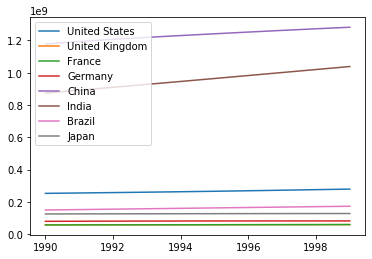

In [17]:
# Criando o dicionário que vai segurar os dados de cada país
dict_resultado = {}

# Primeiro vamos popular o dicionário com as keys dos países desejados
for country in potencias:
    dict_resultado[country] = []

# Colocando os dados no dicionário
for index, row in data.iterrows():
    if row.country in potencias and row.year in range(1990, 2000): # Explicado em baixo
        dict_resultado[row.country].append(row.population)

# Fazendo o gráfico com o dicionário

for country, population in dict_resultado.items():
    plt.plot(range(1990, 2000), population, label=country)
    plt.legend(loc="upper left")

OBS: Quando vamos botar os dados nas listas, não nos preocupamos em organizá-los cronologicamente. A princípio, isso seria uma prática ruim, visto que seria muito fácil ficarmos com dados na seguinte estrutura:

`[(dados de 2000), (dados de 2002), (dados de 2005), (dados de 2001), (dados de 2003)]`

Contudo, esse csv foi organizado previamente de forma cronológica, então não precisamos nos preocupar com isso, visto que o nosso loop vê as linhas de cima para baixo, da mesma forma que elas foram organizadas. Dessa forma, podemos usar o método com range(), que nos permite iterar sobre o csv de forma mais rápida.

Observe que a maioria dos países da lista se mantiveram no mesmo nível. Os 2 únicos com crescimento perceptível são a China e a Índia.

Agora que demonstramos o worflow geral que será feito para analisar os dados, estamos prontos para começar o estudo.

## O cenário atual

Analisaremos o quanto os países atualmente dependem de fontes fósseis de energia.

Nesta seção, analisaremos o consumo de energia produzida por combustíveis fósseis e fontes renováveis nas seguintes categorias:

* Consumo bruto;
* Consumo per capita;
* Consumo percentual.

### Consumo, bruto

Primeiro, vamos analisar o consumo bruto de eletricidade produzida por combustíveis fósseis, em terawatt-hora.

In [18]:
data = pd.read_csv("./data./World Energy Consumption.csv")

# Criando o dicionário
dict_co2_depend = {}
for pais in potencias:
    dict_co2_depend[pais] = []


# Populando o dicionário
ano_inicial = 1980
ano_final = 2020
for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final): # OBS: Isso é seguro de se fazer nesse csv, pois os dados estão organizados cronologicamente. (Explicado na seção Tratamento de Dados)
            if type(row.fossil_electricity == int) or type(row.fossil_electricity == float):
                dict_co2_depend[row.country].append(row.fossil_electricity)
            else: # Se não tem dados sobre esse ano, então colocamos a média do país até então
                dict_co2_depend[row.country].append(np.average(dict_co2_depend[row.country]))
        

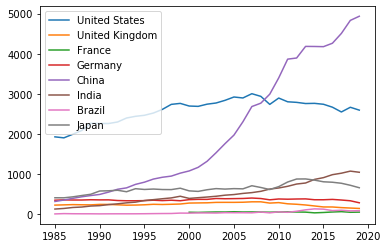

In [19]:
# Agora que temos os dados, vamos fazer um gráfico com eles
for pais, uso in dict_co2_depend.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

Com o gráfico acima, podemos ver que, dos países selecionados, a China e os EUA são de longe os que mais consomem de combustíveis fósseis. Podemos ver também que somente a Índia e a China tiveram um aumento nesse consumo nos últimos anos.

Agora, veremos o consumo de eletricidade advinda de fontes renováveis de energia.

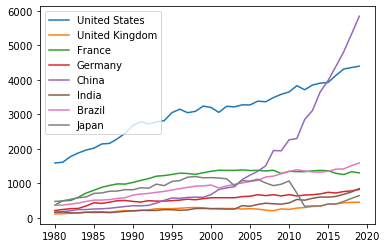

In [20]:
# Criando o dicionário
renew_energy = {}
for pais in potencias:
    renew_energy[pais] = []


# Populando o dicionário
for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.low_carbon_consumption == int) or type(row.low_carbon_consumption == float):
                renew_energy[row.country].append(row.low_carbon_consumption)
            else: # Se não tem dados sobre esse ano, então colocamos a média do país até então
                renew_energy[row.country].append(np.average(renew_energy[row.country]))

# Fazendo o gráfico
for pais, uso in renew_energy.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

Então, aparentemente, a China não só é a que mais consome energia fóssil, mas renovável também. Isso nos leva à conclusão de que a China simplesmente usa mais energia que o resto do mundo.

Agora demonstramos um fator importante neste estudo: ao analisar os dados, sempre devemos levar em conta a população do país. Assim, um país que precisa gerar energia suficiente para sustentar 1 bilhão de pessoas é comparado de forma justa com outro com apenas 50 milhões.

Tendo isso em mente, vamos analisar os dois últimos gráficos de uma forma mais correta.

### Consumo, per capita

Vamos rapidamente refazer os dois últimos gráficos, mas agora com os dados per capita.

In [21]:
# Primeiro, o da dependência de fósseis
dict_co2_per_capita = {}
for pais in potencias:
    dict_co2_per_capita[pais] = []

ano_inicial = 1980
ano_final = 2020
for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.fossil_energy_per_capita == int) or type(row.fossil_energy_per_capita == float):
                dict_co2_per_capita[row.country].append(row.fossil_energy_per_capita)
            else:
                dict_co2_per_capita[row.country].append(np.average(dict_co2_per_capita[row.country]))


# Agora, o das energias renováveis
renew_energy_per_capita = {}
for pais in potencias:
    renew_energy_per_capita[pais] = []

for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.renewables_elec_per_capita == int) or type(row.renewables_elec_per_capita == float):
                renew_energy_per_capita[row.country].append(row.renewables_elec_per_capita)
            else:
                renew_energy_per_capita[row.country].append(np.average(renew_energy_per_capita[row.country]))

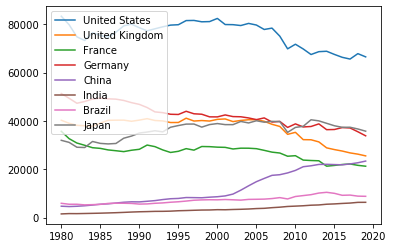

In [22]:
# Gráfico das fósseis

for pais, uso in dict_co2_per_capita.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

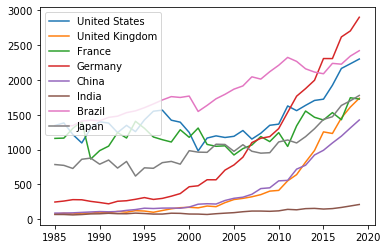

In [23]:
# Gráfico das renováveis

for pais, uso in renew_energy_per_capita.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

Com esses dois gráficos temos uma visão mais correta dos dados. 

No gráfico de dependência fóssil, os países desenvolvidos ficam em evidência, visto que o alto padrão de vida dos seus habitantes resulta em um maior uso de energia de forma geral.

No gráfico de energias renováveis, de novo vemos os países desenvolvidos em destaque, e são os que mais investem no setor. A Alemanha por exemplo, tem uma curva quase exponencial. Vale notar a curva da China, que também vem demonstrando esforços para se modernizar. Dos países listados, somente a Índia aparenta ter um consumo baixo de energia limpa.

Para finalizar nossa análise, vamos agora refazer os dois gráficos uma última vez.

### Consumo, em porcentagem

Agora, vamos comparar a porcentagem de energia suja e limpa consumida por cada um dos paises listados. Como vamos comparar duas categorias para cada país, iremos usar um pie chart. Nele, vamos considerar as médias dos últimos 3 anos.

OBS: Se tiver mudado a lista `potencias`, certifique-se de mudar os parâmetros row e columns na segunda célula.

In [24]:
# Dependência de fósseis
dict_co2_percent = {}
for pais in potencias:
    dict_co2_percent[pais] = []

ano_inicial = 1980
ano_final = 2020
for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.fossil_share_energy == int) or type(row.fossil_share_energy == float):
                dict_co2_percent[row.country].append(row.fossil_share_energy)
            else:
                dict_co2_percent[row.country].append(np.average(dict_co2_percent[row.country]))


# Dependência de renováveis
renew_energy_percent = {}
for pais in potencias:
    renew_energy_percent[pais] = []

for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final):
            if type(row.low_carbon_share_energy == int) or type(row.low_carbon_share_energy == float):
                renew_energy_percent[row.country].append(row.low_carbon_share_energy)
            else:
                renew_energy_percent[row.country].append(np.average(renew_energy_percent[row.country]))

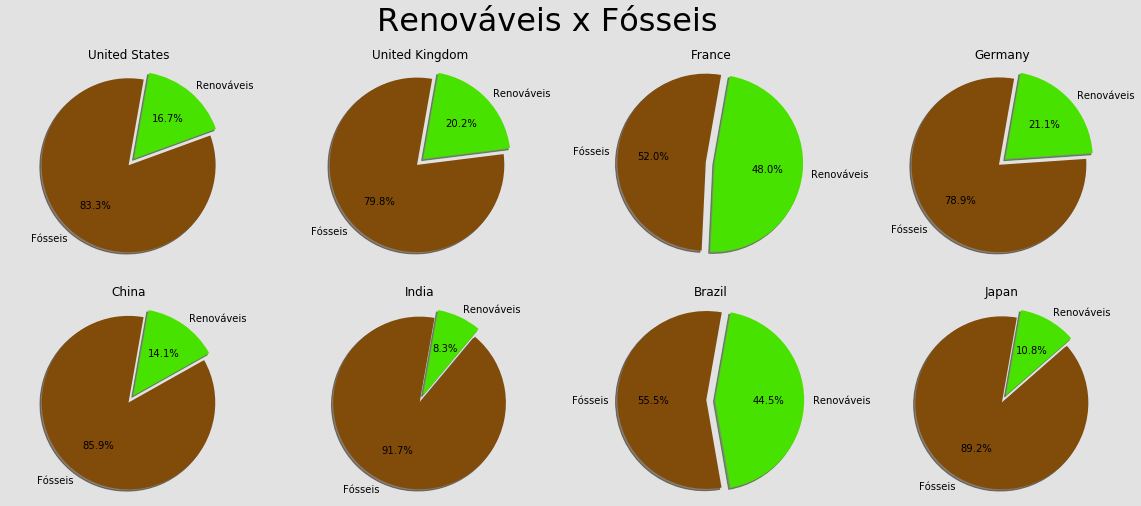

In [25]:
# Vamos fazer os 8 pie charts.

rows = 2 # Quantas linhas de gráficos
columns = 4 # Quantas colunas
h = 8 # Altura da imagem com os gráficos
l = 20 # Largura da imagem

figure, axis= plt.subplots(rows, columns, figsize=(l, h))
figure.suptitle("Renováveis x Fósseis", fontsize = 32)
figure.patch.set_facecolor("#E2E2E2")
labels = ["Fósseis", "Renováveis"]
colors = ["#814B0A", "#48E200"]
explode = (0.1, 0) # Isso faz com que a primeira label na lista acima seja a que "saia" do gráfico
ultimos_x_anos = 4 # Lembrar que esse número é x-1. Ex: Se colocarmos 4, veremos a média dos últimos 3 anos.

medias_renovaveis = {}
medias_fosseis = {}
# Populando os dicionários com as médias correspondentes dos ultimos x-1 anos
for pais in potencias:
    medias_fosseis[pais] = np.average(dict_co2_percent[pais][:-ultimos_x_anos:-1])
    medias_renovaveis[pais] = np.average(renew_energy_percent[pais][:-ultimos_x_anos:-1])

# Fazendo o gráfico para cada um dos países
current_row = 0
current_column = 0
for pais in potencias:
    data = [medias_fosseis[pais], medias_renovaveis[pais]]
    axis[current_row, current_column].pie(data, 
                                          labels=labels, 
                                          explode=explode, 
                                          autopct='%1.1f%%', 
                                          shadow=True,
                                          colors=colors,
                                          startangle=80)
    axis[current_row, current_column].set_title(f"{pais}")
    axis[current_row, current_column].axis("equal")
    current_column += 1
    if current_column > 3:
        current_row += 1
        current_column = 0

Com os gráficos acima, podemos ter uma visão mais completa da matriz energética de cada um dos 8 países. Aqui vemos que, em média, os países desenvolvidos e em desenvolvimento tem na verdade aproximadamente a mesma fatia de consumo de energias fósseis e renováveis, com a exceção do Brasil e França, que se destacam com mais ou menos 45% de energia limpa.

-CONCLUSÃO-